In [1]:

import os
from os import path
import pandas as pd
import re
from selenium import webdriver


In [94]:
directory = '/home/zachkaras/codeSummary_eyetracking/codesummary_eyetracking/task/eyetracking_visualization/cap_string_test/'
#directory = './eyetracking_visualization/test/'
os.chdir(directory)

In [99]:
all_pics = os.listdir(directory)
#all_pics = pd.DataFrame(all_pics)
#all_pics.head()

In [102]:
test = re.findall('\d+', all_pics[0])
print(test)

['11', '27', '2913']


In [6]:
driver = webdriver.Chrome
driver.get('https://www.python.org')


TypeError: get() missing 1 required positional argument: 'url'

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#img = cv2.imread("./bounding_boxes/add_copy.png")
img = cv2.imread("./eyetracking_visualization/reading_task.png")
print(img.shape)

(1040, 1920, 3)


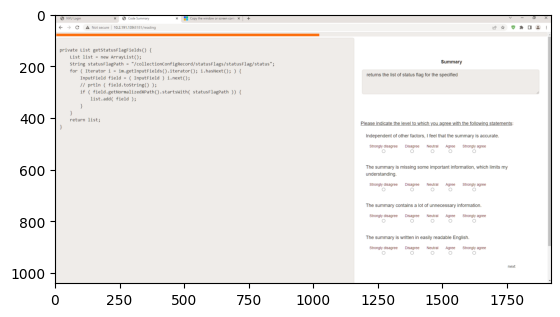

In [11]:
plt.imshow(img)

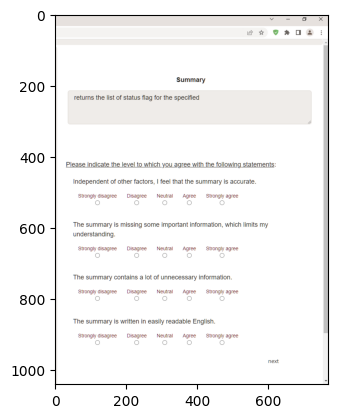

In [24]:
crop_test = img[:, 1150:1920] # these settings look good for visualization purposes of reading stimuli
plt.imshow(crop_test)
# cropped_image = img[100:1000, 10:1150]  # these measurements look good
# test = cropped_image[11:(11+15), 494:(494+24)]

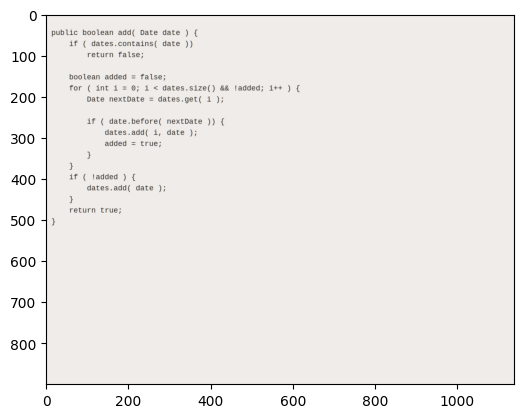

In [25]:
plt.imshow(cropped_image)

In [3]:
import cv2
import pandas as pd
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

#pytesseract.pytesseract.tesseract_cmd = '/home/zachkaras/.local/bin/pytesseract'

# Add code here for reading in input
img = cv2.imread('./bounding_boxes/final_stimuli/add.png')
img = img[100:1000, 10:1150]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
dilation = cv2.dilate(thresh, rect_kernel, iterations=1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

img2 = img.copy()
#plt.imshow(gray)
# exit(1)
# #img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# #plt.imshow(img)
# # # Convert to gray    
# # #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # Apply dilation and erosion to remove some noise    
# # kernel = np.ones((1, 1), np.uint8)    
# # img = cv2.dilate(img, kernel, iterations=1)    
# # img = cv2.erode(img, kernel, iterations=1)
# c = 0
for box in contours:

    x, y, w, h = cv2.boundingRect(box)  # coordinates, width, and height
    tangle = cv2.rectangle(img2, (x, y), (x+w, y+h),
                           (0, 255, 0, 2))  # drawing the rectangle

    word_img = gray[y:y+h, x:x+w]  # getting the word from the image
    test_y = word_img.shape[0]
    test_x = word_img.shape[1]
    #plt.imshow(word_img)
    test = cv2.resize(word_img, (test_x * 5, test_y * 5))
    
    cv2.imwrite("./resizeTest.png", test)
    

    #word = "word{c}".format(c=c)  # FIXME - temp before I can get pytesseract
    #word = pytesseract.image_to_string(word_img)
    #print(type(word))
    #test.append(word)
    exit(1)

    #new_entry = {word: [[x, y], [x+w, y], [x, y+h], [x+w, y+h]]}
    #pd.concat([coordinates, new_entry])


In [ ]:
# Doing some preprocessing on the screenshot https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/
ret, thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
dilation = cv2.dilate(thresh, rect_kernel, iterations=1)
contours, hierarchy = cv2.findContours(
    dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
plt.imshow(img)

#img2 = img.copy()
img2 = cv2.resize(img, (0, 0), fx=2, fy=2)
#pytesseract.image_to_string(img2, thresh)
# putting all coordinates for each function's bounding boxes into their own CSVs
coordinates = pd.DataFrame()
c = 1
test = []
# adding coordinates for each word into two separate lists
for box in contours:

    x, y, w, h = cv2.boundingRect(box)  # coordinates, width, and height
    tangle = cv2.rectangle(img2, (x, y), (x+w, y+h),
                           (0, 255, 0, 2))  # drawing the rectangle

    word_img = img2[y:y+h, x:x+w]  # getting the word from the image

    word = "word{c}".format(c=c)  # FIXME - temp before I can get pytesseract
    word = pytesseract.image_to_string(word_img)
    #print(type(word))
    test.append(word)
    c += 1

    #new_entry = {word: [[x, y], [x+w, y], [x, y+h], [x+w, y+h]]}
    #pd.concat([coordinates, new_entry])

#coordinates.to_csv('./word_coordinates/{file}.csv'.format(file=filename[:-4]))
print(test)
print(len(test))
